<a href="https://colab.research.google.com/github/dvd3110/5th-sem_-AI-lab/blob/main/MP2_tweets_data_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/disaster_tweets_data(DS).csv'
data = pd.read_csv(file_path)

print(data.head(10))

                                              tweets  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1
5  #RockyFire Update => California Hwy. 20 closed...       1
6  #flood #disaster Heavy rain causes flash flood...       1
7  I'm on top of the hill and I can see a fire in...       1
8  There's an emergency evacuation happening now ...       1
9  I'm afraid that the tornado is coming to our a...       1


In [ ]:
# Check for null values
print(data.isnull().sum())

# Drop rows with null values (if any)
data = data.dropna()


tweets    0
target    0
dtype: int64


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess tweets
def preprocess_tweet(tweet):
    # Convert to lower case
    tweet = tweet.lower()
    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Tokenize
    words = nltk.word_tokenize(tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
data['tweets'] = data['tweets'].apply(preprocess_tweet)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Choose one of the vectorizers
vectorizer = CountVectorizer()  # or TfidfVectorizer()

# Fit and transform the tweets
X = vectorizer.fit_transform(data['tweets'])


In [ ]:
y = data['target']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "KNN Classification": KNeighborsClassifier()
}

# Function to apply models
def apply_models(models, X_train, y_train, X_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Results for {name}:\n")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("-" * 50)

# Apply models
apply_models(models, X_train, y_train, X_test)


Results for Multinomial Naive Bayes:

Confusion Matrix:
 [[745 129]
 [172 477]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       874
           1       0.79      0.73      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

--------------------------------------------------
Results for Logistic Regression:

Confusion Matrix:
 [[747 127]
 [190 459]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       874
           1       0.78      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

--------------------------------------------------
Results for KNN Classification:

Confu

Results for Multinomial Naive Bayes:

Confusion Matrix:
 [[745 129]
 [172 477]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       874
           1       0.79      0.73      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523



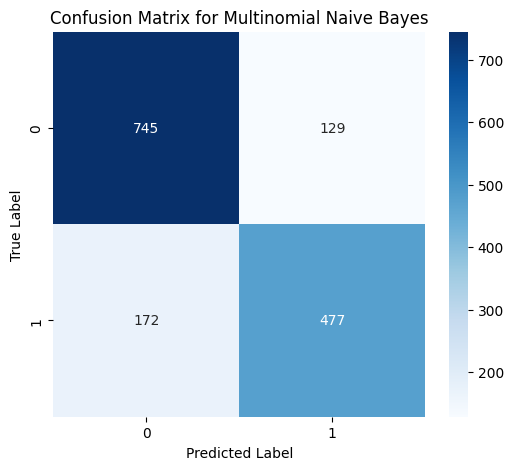

--------------------------------------------------
Results for Logistic Regression:

Confusion Matrix:
 [[747 127]
 [190 459]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       874
           1       0.78      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



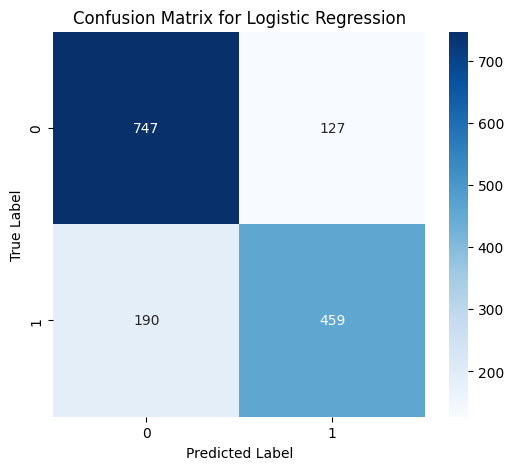

--------------------------------------------------
Results for KNN Classification:

Confusion Matrix:
 [[857  17]
 [475 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78       874
           1       0.91      0.27      0.41       649

    accuracy                           0.68      1523
   macro avg       0.78      0.62      0.60      1523
weighted avg       0.76      0.68      0.62      1523



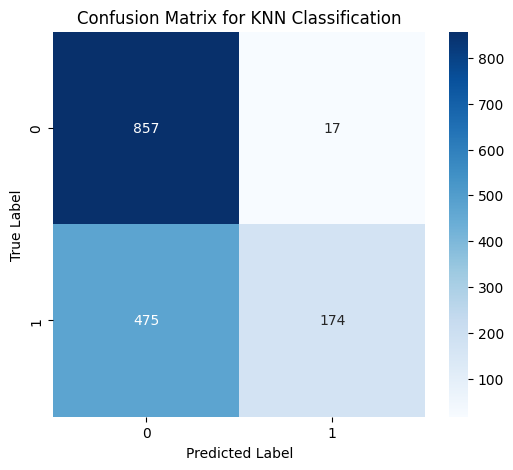

--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Updated function to apply models and plot confusion matrix
def apply_models_and_plot(models, X_train, y_train, X_test, y_test):
    model_performance = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Results for {name}:\n")
        print("Confusion Matrix:\n", cm)
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        plot_confusion_matrix(cm, name)
        accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
        model_performance[name] = accuracy
        print("-" * 50)
    return model_performance

# Apply models and plot confusion matrix
model_performance = apply_models_and_plot(models, X_train, y_train, X_test, y_test)


In [ ]:
# Step 10: Report the model with the best accuracy
# Calculate the accuracy of each model
accuracy_nb = models["Multinomial Naive Bayes"].score(X_test, y_test)
accuracy_lr = models["Logistic Regression"].score(X_test, y_test)
accuracy_knn = models["KNN Classification"].score(X_test, y_test)

# Print the accuracies
print(f"\nAccuracy for Multinomial Naïve Bayes: {accuracy_nb}")
print(f"Accuracy for Logistic Regression: {accuracy_lr}")
print(f"Accuracy for KNN Classification: {accuracy_knn}")

# Determine the best model
best_model = max(accuracy_nb, accuracy_lr, accuracy_knn)
if best_model == accuracy_nb:
    print("The best model is Multinomial Naïve Bayes.")
elif best_model == accuracy_lr:
    print("The best model is Logistic Regression.")
else:
    print("The best model is KNN Classification.")



Accuracy for Multinomial Naïve Bayes: 0.8023637557452397
Accuracy for Logistic Regression: 0.7918581746552856
Accuracy for KNN Classification: 0.6769533814839134
The best model is Multinomial Naïve Bayes.


In [ ]:
# Finding the model with the best accuracy
best_model = max(model_performance, key=model_performance.get)
print(f"The model with the best accuracy is: {best_model} with an accuracy of {model_performance[best_model]:.2f}")


The model with the best accuracy is: Multinomial Naive Bayes with an accuracy of 0.80


Accuracy for Multinomial Naïve Bayes: 0.8023637557452397
Accuracy for Logistic Regression: 0.7918581746552856
Accuracy for KNN Classification: 0.6769533814839134
The best model is Multinomial Naive Bayes with an accuracy of 0.8024


<ipython-input-12-46492106cb13>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


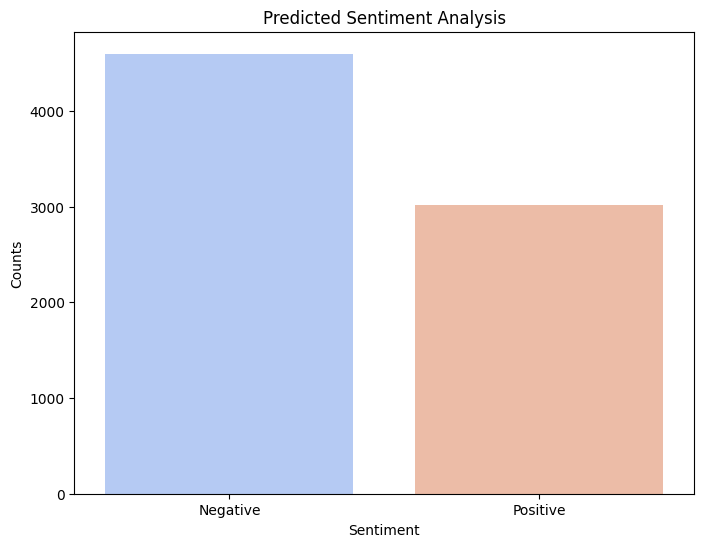

In [ ]:
# Re-evaluate the models to obtain the accuracy scores
# Since the models have already been trained in previous steps, we will just calculate the scores again.

accuracy_nb = models["Multinomial Naive Bayes"].score(X_test, y_test)
accuracy_lr = models["Logistic Regression"].score(X_test, y_test)
accuracy_knn = models["KNN Classification"].score(X_test, y_test)

# Print the accuracies
print(f"Accuracy for Multinomial Naïve Bayes: {accuracy_nb}")
print(f"Accuracy for Logistic Regression: {accuracy_lr}")
print(f"Accuracy for KNN Classification: {accuracy_knn}")

# Find the best model
accuracies = {
    "Multinomial Naive Bayes": accuracy_nb,
    "Logistic Regression": accuracy_lr,
    "KNN Classification": accuracy_knn
}
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
best_model_accuracy = accuracies[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

# Predict sentiments using the best model
predicted_sentiments = best_model.predict(X)

# Add the predictions to the dataframe
data['PredictedSentiment'] = predicted_sentiments

# Assuming 0 is negative and 1 is positive
data['SentimentAnalysis'] = data['PredictedSentiment'].map({0: 'Negative', 1: 'Positive'})

# Plot the sentiment distribution
sentiment_counts = data['SentimentAnalysis'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Predicted Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


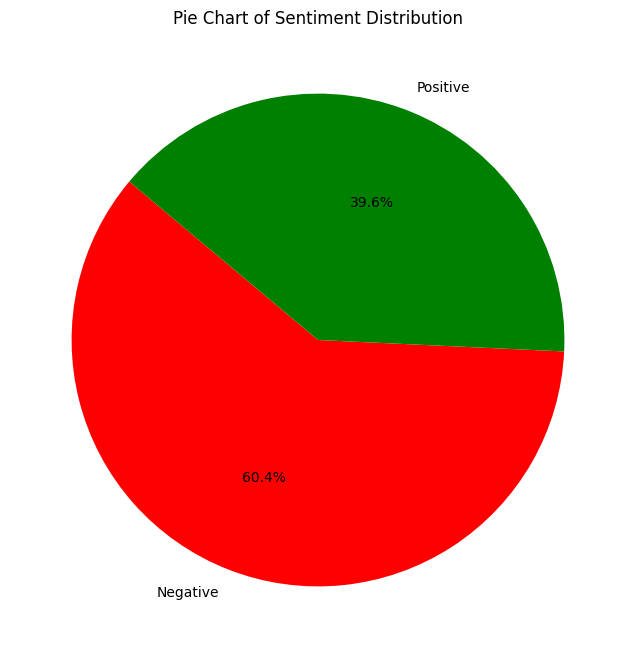

In [ ]:
# Pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
data['SentimentAnalysis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Pie Chart of Sentiment Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()
